Im[porting the dependencies

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [91]:
# loading the csv data to a pandas dataframe
dataset = pd.read_csv(r"C:\Users\sydul\Downloads\gld_price_data.csv")

In [93]:
 # loading first 5 rows in the dataframe
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [95]:
#  print last 5 rows of the dataframe
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [97]:
# number of rows and columns
dataset.shape

(2290, 6)

In [99]:
# getting some basic informations about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [101]:
# checking the number of missing values
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [114]:
# getting the statistical measures of the data
dataset.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


Correlation:

1. Positive correlation

2. Negative correlation

In [117]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')  # Convert date column
numeric_data = dataset.select_dtypes(include=['number'])  # Select numeric columns
correlation = numeric_data.corr()  # Compute correlation matrix
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [119]:
correlation = dataset.corr()

<Axes: >

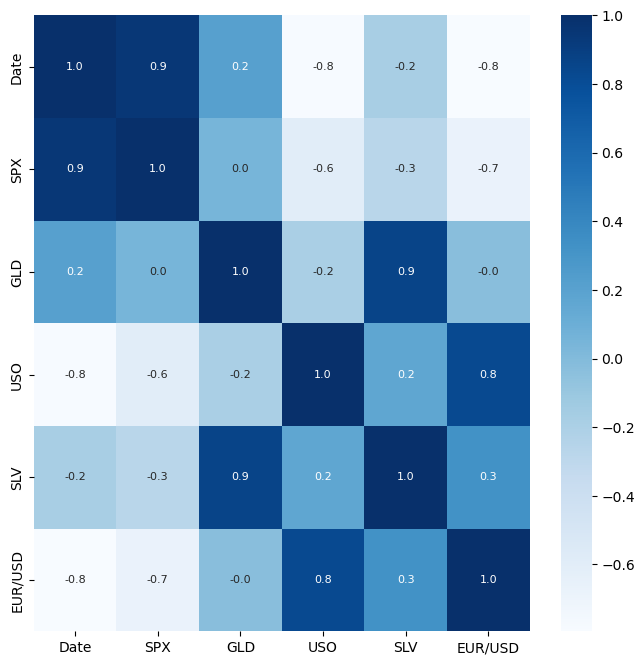

In [121]:
 # constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [123]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


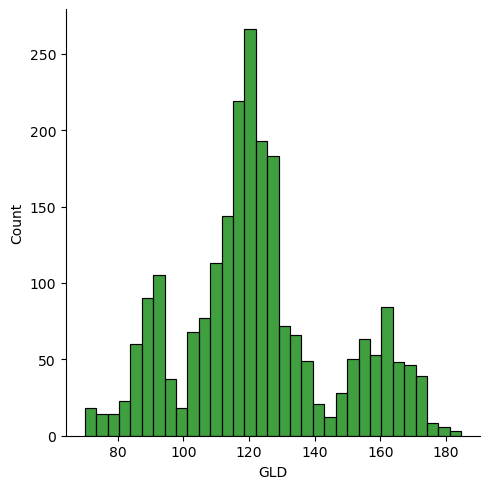

In [125]:
# checking the distribution of the GLD price
sns.displot(dataset['GLD'],color='green')

splitting the Features and Test


In [128]:
x =dataset.drop(['Date','GLD'],axis=1)
y=dataset['GLD']

In [130]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [132]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [135]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

Model Training: 
Random Forest Regressor

In [138]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [143]:
# prediction on Test data
test_data_prediction=regressor.predict(x_test)

In [145]:
print(test_data_prediction)

[168.47319921  81.98189977 116.02930027 127.52430085 120.74530144
 154.70849791 150.17059915 125.91440016 117.50719873 125.91860113
 116.74300094 171.27890038 140.84279803 167.42449874 115.24470015
 117.33000062 140.37610229 170.17460178 159.68480291 160.83639989
 155.15079994 125.64400024 176.83730018 157.02790319 125.13000046
  93.7452001   77.54869998 120.56959991 119.11329948 167.4834997
  88.07840079 125.14369983  91.27140072 117.82800033 121.18179927
 136.46970052 115.57090113 115.36010098 147.52269959 107.00060113
 104.3818026   87.07969756 126.58600045 117.97249994 153.63779895
 119.63159953 108.34309996 108.02309855  93.12290056 126.93669831
  75.07940019 113.67819915 121.17590009 111.18679911 118.96169925
 120.60179941 160.10379997 167.86800065 146.94149685  85.78799829
  94.64140036  86.9353988   90.46280035 118.94720116 126.48420081
 127.59309997 169.42430003 122.3341996  117.35149873  98.59310064
 167.62350161 144.02549852 131.75470245 121.11900223 121.07359968
 119.832300

In [147]:
# R squared error
error_score =metrics.r2_score(y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.989126952611195


compare the actual values and predicted values in a plot


In [150]:
y_test = list(y_test)

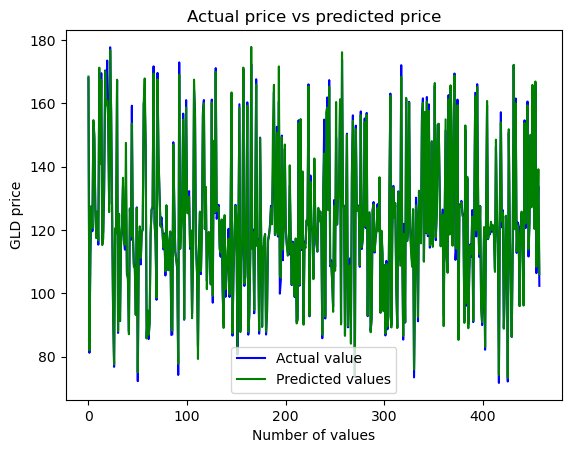

In [152]:
plt.plot(y_test, color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted values')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()